# Assignment 2

**Deadline**:  December 8, 23.59.

Your notebook should not give errors when executed with `Run All`. Please submit your answers via [Canvas](https://canvas.uva.nl/courses/12430/assignments/78394).

|**Name**|**Student ID**|**Email**|
|:-------|:-------------|:--------|
|Jason Spano|*******|******|


****Hand in the following:****
* Your notebook. N.B. **click on `Kernel`-> `Restart & Run All`** before submitting, see notes.
* A (printed) pdf version of your notebook.

****NOTES****:
* This is an individual assignment. Teamwork is **not** permitted, including during lectures.
* The assignment is a partial stand-in for a final examination, so the usual rules regarding plagiarism and fraud apply, with all attendant consequences. Code found on the internet or elsewhere is not acceptable as a solution.
* Efficient code is required for full marks.
* Make sure that any function you write has a docstring, and comments where appropriate.
* Before submitting your work, **click on `Kernel`-> `Restart & Run All`** and verify that your notebook produces the desired results and does not error.
* Some questions require you to write code to obtain a numerical result (e.g., an option price). In that case, don't just give the function, but also the result of calling it with the given parameter values (i.e., the numerial value that it returns). If your function uses random numbers, then set the seed to 0 before calling it. This makes it much easier to grade the assignments (at least as long as the answer is correct).


**Declaration of Originality**:

By submitting these answers, I declare that
1. I have read and understood the notes above.
2. These solutions are solely my own work.
3. I have not made these solutions available to any other student.

**Question A**:
Consider an $N$-period model with two assets: a riskless bond with value $B_t=e^{rt}$, and a stock that evolves according to a binomial tree, such that $S_t=S_{t-\delta t}u$ or $S_t=S_{t-\delta t}d$ in the good and bad states of the world, respectively. Here $u=1/d=\exp(\sigma\sqrt{\delta t})$ and $\delta t= T/N$ as usual. We would like to price a *chooser* option, which has the property that, after $M<N$ periods, the holder can choose whether the option is a European call or put option, both maturing after $N$ periods, and with the same strike price $K$ (See Hull, section 25.7 (ed. 8) or 26.8 (ed. 9/10)). Denoting their prices after $i$ periods as $C_{i}$ and $P_{i}$, respectively, the payoff of the chooser option after $M$ periods is $V_{M}=\max \{C_{M},P_{M}\}\,$. Our starting point is the function `calltree` (or `calltree_numpy`) from Week 4. **For each of the following subquestions, your answer should include the function itself, as well as the result of calling it with the following parameter values**: $S_0 = 9$, $K = 11$, $T = 3/12$, $r = 0.025$, $\sigma = 0.3$, $q = 0.01$, $N = 500$, $M=200$.

   1. We want to allow for a dividend yield, $q$. Construct a calltree pricer (vectorised) which accepts an additional input argument `q`. That is, the function becomes `calltree_numpy(S0, K, T, r, sigma, q, N)`. In the function change the risk-neutral probability to $(e^{(r-q)\delta t}-d)/(u-d)$.

   * Building on your function from the previous question write a function `chooser(S0, K, T, r, sigma, q, N, M)` that prices a European chooser option. Along with the call price tree, this function should also compute a put price tree stored in a matrix `P` (of the same size as the call price matrix). Following computation of `C` and `P`, create a $(M+1) \times (M+1)$ matrix `CH`, which stores the tree for the chooser option. At point in time `M`, the last column of this tree will be populated with $V_M=\max \{C_{M},P_{M}\}\,$. Based on the `CH` tree perform the backwards induction to determine the price of the chooser.

   * Now consider a chooser option for which after $M$ periods, the holder will choose between an *American* call or an *American* put (above we were choosing between a *European* call and a *European* put). Modify the function from above so that before populating the chooser tree `CH` the first loop also determines whether to exercise or keep the respective *American* put and *American* call. Call the function that evaluates the price of this particular derivative `chooser_american(S0, K, T, r, sigma, q, N, M)`.

   * For the given parameters values ($S_0$, $K$, $T$, $r$, $\sigma$, $q$, $N$) plot the prices of `chooser` and `chooser_american` as a function of $M$. That is, produce a graph that has the prices of the two options on the y-axis and $M$ on the x-axis. Describe and explain (in words) the price convergence.

In [1]:
import numpy as np
import scipy.stats.mstats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Question A1. We want to allow for a dividend yield, $q$. Construct a calltree pricer (vectorised) which accepts an additional input argument `q`. That is, the function becomes `calltree_numpy(S0, K, T, r, sigma, q, N)`. In the function change the risk-neutral probability to $(e^{(r-q)\delta t}-d)/(u-d)$.

In [2]:
#def calltree with addition of dividend term (q)
def calltree_numpy(S0, K, T, r, sigma, q, N): 
    
    ## define delta(T)
    deltaT = T / float(N)
    
    ## define the up and down movementsi n the tree 
    u = np.exp(sigma*np.sqrt(deltaT))
    d = 1.0 / u
    
    #risk neutral probability adjusted according to specification (of the question)
    p = (np.exp((r-q)*deltaT)-d) / (u-d)
    
    ## code the up and down movements in the tree 
    piu = np.exp(-r*deltaT) * p
    pid = np.exp(-r*deltaT) * (1-p)
    
    ## create a stock price tree based off the movement of the stock price under (u) and (d)
    C = np.zeros((N+1, N+1))
    S = S0 * u**np.arange(N+1) * d**(2*np.arange(N+1)[:, np.newaxis])
    
    #keep only the upper triangular part of the matrix (where the payoff is != 0)
    S = np.triu(S) 
    
    ## apply the options payoff function
    C[:, N] = np.maximum(0, S[:, N]-K) 
    
    ## backwards induction after the final node: 
    for j in range(N-1, -1, -1):
        C[:j+1, j] = piu * C[:j+1, j+1] + pid * C[1:j+2, j+1]
        
    return C[0, 0]

In [3]:
S0=9.; K=11.; T=3/12.; r=.025; sigma=.3; q=.01; N=500; #run function with given values
calltree_numpy(S0, K, T, r, sigma, q, N)

0.06554359536314218

In [4]:
%timeit calltree_numpy(S0, K, T, r, sigma, q, N) #ipython magic for timing things

6.48 ms ± 564 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Question A2. Building on your function from the previous question write a function `chooser(S0, K, T, r, sigma, q, N, M)` that prices a European chooser option. Along with the call price tree, this function should also compute a put price tree stored in a matrix `P` (of the same size as the call price matrix). Following computation of `C` and `P`, create a $(M+1) \times (M+1)$ matrix `CH`, which stores the tree for the chooser option. At point in time `M`, the last column of this tree will be populated with $V_M=\max \{C_{M},P_{M}\}\,$. Based on the `CH` tree perform the backwards induction to determine the price of the chooser.

In [5]:
## chooser function with additional dividend term (q)
def chooser(S0, K, T, r, sigma, q, N, M): 
    
    ## define time intervals delta_t
    deltaT = T / float(N)
    
    ## define up and down movements in the tree
    u = np.exp(sigma*np.sqrt(deltaT))
    d = 1.0 / u
    
    #risk neutral probability adjusted according to specification
    p = (np.exp((r-q)*deltaT)-d) / (u-d) 
    piu = np.exp(-r*deltaT) * p
    pid = np.exp(-r*deltaT) * (1-p)
    
    # create matrix P/C
    C = np.zeros((N+1, N+1))
    P = np.zeros((N+1, N+1)) 
    
    S = S0 * u**np.arange(N+1) * d**(2*np.arange(N+1)[:, np.newaxis])
    
    ## keep only the upper triangular part (not necessary but speed enhancement)
    S = np.triu(S) 
    
    ## calculate payoffs 
    C[:, N] = np.maximum(0, S[:, N]-K) 
    P[:, N] = np.maximum(0, K-S[:, N]) 
    
    #for loop to populate put and call matrices
    for j in range(N-1, -1, -1):
        C[:j+1, j] = piu * C[:j+1, j+1] + pid * C[1:j+2, j+1]
        P[:j+1, j] = piu * P[:j+1, j+1] + pid * P[1:j+2, j+1]
        
    #return C[0, 0], P[0, 0] #check to see prices for put and call
    
    #create chooser matrix
    CH = np.zeros((M+1, M+1)) 
    
    #populate last column with maximum of put/call
    CH[:, M] = np.maximum(C[:M+1, M], P[:M+1, M])
    
    #backwards induction
    for i in range(M-1, -1, -1):
        CH[:i+1, i] = piu * CH[:i+1, i+1] + pid * CH[1:i+2, i+1]
        
    ## return price     
    return CH[0, 0]

In [6]:
#run function with given values
S0=9.; K=11.; T=3/12.; r=.025; sigma=.3; q=.01; N=500; M=200; 
chooser(S0, K, T, r, sigma, q, N, M)

2.025914426146793

In [7]:
%timeit chooser(S0, K, T, r, sigma, q, N, M) 

13.8 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Question A3.  Now consider a chooser option for which after 𝑀 periods, the holder will choose between an American call or an American put (above we were choosing between a European call and a European put). Modify the function from above so that before populating the chooser tree CH the first loop also determines whether to exercise or keep the respective American put and American call. Call the function that evaluates the price of this particular derivative chooser_american(S0, K, T, r, sigma, q, N, M).

In [8]:
def chooser_american(S0, K, T, r, sigma, q, N, M): #
    ## variables as defined above: 
    deltaT = T / float(N)
    u = np.exp(sigma*np.sqrt(deltaT))
    d = 1.0 / u
    p = (np.exp((r-q)*deltaT)-d) / (u-d) 
    piu = np.exp(-r*deltaT) * p
    pid = np.exp(-r*deltaT) * (1-p)
    
    C = np.zeros((N+1, N+1))
    P = np.zeros((N+1, N+1)) 
    S = S0 * u**np.arange(N+1) * d**(2*np.arange(N+1)[:, np.newaxis])
    S = np.triu(S) 
    
    C[:, N] = np.maximum(0, S[:, N]-K)
    P[:, N] = np.maximum(0, K-S[:, N]) 
    
    ## loop for the payoffs 
    for j in range(N-1, -1, -1):
        C[:j+1, j] = piu * C[:j+1, j+1] + pid * C[1:j+2, j+1] 
        C[:j+1, j] = np.maximum(C[:j+1, j], S[:j+1,j]-K)
        
        #take the maximum of the remaining value or value at n-1
        P[:j+1, j] = piu * P[:j+1, j+1] + pid * P[1:j+2, j+1]
        #take the maximum of the remaining value or value at n-1
        P[:j+1, j] = np.maximum(P[:j+1, j], K-S[:j+1, j] )
        

    #create chooser matrix
    CH = np.zeros((M+1, M+1)) 
    
    #populate last column with maximum of put/call
    CH[:, M] = np.maximum(C[:M+1, M], P[:M+1, M])
    
    #backwards induction
    for i in range(M-1, -1, -1):
        CH[:i+1, i] = piu * CH[:i+1, i+1] + pid * CH[1:i+2, i+1]
    return CH[0, 0]

In [9]:
S0=9.; K=11.; T=3/12.; r=.025; sigma=.3; q=.01; N=500; M=200; #run function with given values
chooser_american(S0, K, T, r, sigma, q, N, M)

2.0418690863961153

In [10]:
%timeit chooser_american(S0, K, T, r, sigma, q, N, M) #ipython magic for timing things

20.4 ms ± 1.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Question A4. For the given parameters values ($S_0$, $K$, $T$, $r$, $\sigma$, $q$, $N$) plot the prices of `chooser` and `chooser_american` as a function of $M$. That is, produce a graph that has the prices of the two options on the y-axis and $M$ on the x-axis. Describe and explain (in words) the price convergence.

In [11]:
S0=9.; K=11.; T=3/12.; r=.025; sigma=.3; q=.01; N=500
M = range(0, 499)

## create empty lists to hold the prices of the choosers 
Chooser_EU = []
Chooser_USA = []

for j in M:
    
    ## apply valuation function for european chooser up until M=499 (must be < 500)
    x1 = chooser(S0, K, T, r, sigma, q, N, j)
    
    #calculate prices for american chooser up until M=499 (should be less than 500)
    x2 = chooser_american(S0, K, T, r, sigma, q, N, j)
    
    ## append values to lists 
    Chooser_EU.append(x1)
    Chooser_USA.append(x2)

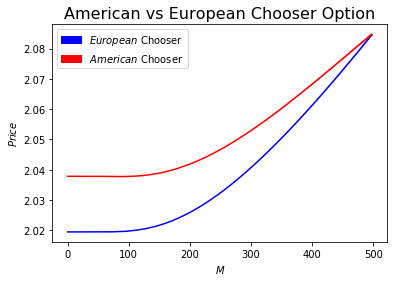

In [12]:
## plot the prices of the two options over time 
plt.plot(Chooser_EU, color='blue')
plt.plot(Chooser_USA, color='red')
plt.title('American vs European Chooser Option', fontsize=16)
plt.xlabel('$M$')
plt.ylabel('$Price$')

#create legend with corresponding colours
eu_patch = mpatches.Patch(color='blue', label='$European$ Chooser')
us_patch = mpatches.Patch(color='red', label='$American$ Chooser')
plt.legend(handles=[eu_patch, us_patch])
plt.show();

To begin with, the American chooser option has a clear premium over the European one, due to the fact that the American one has the additional flexibility of being exercisable before the actual exercise date, as opposed to a European one. As time goes by, the holder of an American option has fewer and fewer opportunities to exercise the option early, hence both prices converge towards slightly over 2.08 as M approaches 500(=N--> exercise date).

#  **Question B**:

 We wish to obtain the no-arbitrage price $X_{0}$ of an index-linked certificate. The derivative has payoff $X_{T}$, defined from the path of an equity index $\{S_{t}\}_{0\leq t\leq T}$ as follows:
 $$
 X_{T}=S_{0}\prod\nolimits_{t=1}^{T}(1+\max (R_{t},R)),\qquad R_{t}=\frac{S_{t}-S_{t-1}}{S_{t-1}},\qquad R=e^{r}-1,
 $$
 where $r\equiv \log (1+R)$ is the continuously compounded interest rate, so that $R$ is the corresponding annually compounded interest rate. Time is measured in years, and $T$ is a positive integer, representing the number of years after which the payoff is received. The idea behind this derivative is that the investor participates in the upside potential of the stock market, but receives a guaranteed minimum return. The value $X_{0}$ of this product cannot be evaluated analytically. 

 We assume a Black-Scholes economy and use the following parameter values: $S_0=12$, $T=10$, $R=0.025$, $\sigma =0.3$, and $q =0.01$. 
     
   1. Using `asianmc_vec` (and `bmsim_vec`) as a starting point, modify the `payoff` of the derivative accordingly. Call the function `certificatemc(S0, R, T, sigma, q, numsim=10000)`, which will return the Monte Carlo estimate of $X_{0}$, along with a 95% confidence interval. **Notice that both the interval and the CI should be stated explicitly in your answers, based on a random seed of 0**.
   
   2. Consider a second derivative with payoff $F_{T}=\max (S_{0}(1+R)^{T},S_{T})$. Show (with pen and paper, or preferably inside the notebook using Markdown and $\LaTeX$) that the no-arbitrage price $F_{0}$ is
 $$  
 F_{0}=S_{0}(1+e^{-q T}\Phi (d_{1})-\Phi (d_{2})),
 $$
 where
 $$
 d_{1}=\frac{(-q +\frac{1}{2}\sigma ^{2})T}{\sigma \sqrt{T}},\qquad
 d_{2}=d_{1}-\sigma \sqrt{T}=\frac{(-q -\frac{1}{2}\sigma ^{2})T}{\sigma
 \sqrt{T}}.
 $$
 Hint: The payoff $F_T$ can be replicated with a position in cash bonds and a European call option with a non-standard strike price; re-arrange $F_{T}=\max (S_{0}(1+R)^{T},S_{T})$ to understand this.
 
 Building on `blackscholes(S0, K, T, r, sigma)` (see week 4), write a function `F0(S0, R, T, sigma, q)` that evaluates the price of the derivative. 
**The resulting value for the given parameter values should be given explicitly in your answer**.

3.   Write a function `certificatecv(S0, R, T, sigma, q, numsim=10000)` that improves upon your code from the previous question by using $F_{T}$ as a control variate.
**Report the improved estimate $\hat{X}_{0}$ along with an apropriately constructed confidence interval, based on a random seed of 0.** Then, compare the CI with the one based on the crude MC estimate, and discuss your findings; are they in line with the theory? Has the computational cost increased?

4. Test if the confidence interval returned by `certificatecv` has correct coverage, by simulating 1000 independent ones (with `numsim=1000`), and recording in a hit series $I_j$, $j\in\{1, \ldots, 1000\}$, whether an interval contains the true price ($I_j=1$) or not ($I_j=0$). The test can be conducted by regressing $\{I_j-0.95\}_{j=1}^{1000}$ on an intercept and testing whether that is zero. The 'true' price should be obtained from `certificatecv` with `numsim=100000`.

Question B1. Using asianmc_vec (and bmsim_vec) as a starting point, modify the payoff of the derivative accordingly. Call the function certificatemc(S0, R, T, sigma, q, numsim=10000), which will return the Monte Carlo estimate of 𝑋0, along with a 95% confidence interval. Notice that both the interval and the CI should be stated explicitly in your answers, based on a random seed of 0.

In [2]:
S0=12; T=10; R=0.025; sigma=0.3; q=0.01; N=T

In [9]:
## Note new input: numsim --  the number of paths.
def bmsim_vec(T, N, X0=0, mu=0, sigma=1, numsim=1): 
    
#Simulate `numsim` quantity of Brownian motion paths.
    deltaT = float(T)/N
    tvec = np.linspace(0, T, N+1)
    z = np.random.randn(numsim, N+1) #(N+1)->(numsim, N+1)
    dX = mu*deltaT + sigma*np.sqrt(deltaT)*z
    
    dX[:, 0] = 0. #dX[0]->dX[:, 0]
    X = np.cumsum(dX, axis=1) #cumsum(dX)->cumsum(dX, axis=1)
    X += X0
    return tvec, X

In [10]:
def certificatemc(S0, R, T, sigma, q, numsim=10000):
    
    #Monte Carlo price of an arithmetic average Asian call, adapted to index-linked certificate.
    X0 = np.log(S0)
    r = np.log(1+R) # define r as above
    nu = r-q-.5*sigma**2
    
    #simulate all paths at once:
    # simulate the stock price
    _, X = bmsim_vec(T, N, X0, nu, sigma, numsim)
    S = np.exp(X)
    S_tlag = S[:,:N]
    S_t = S[:,1:]
    
    #calculate return of index
    Rt = (S_t - S_tlag) / S_tlag 
    
    # take maximum of index return or guaranteed rate
    R_max = np.maximum(Rt,R) 
    
    #calculate return for each year
    R_max = np.cumprod(1+R_max,axis=1) 
    
    ## payyoffs
    payoffs = S0 * R_max[:,N-1] 
    
    ## discount the payoffs
    g = np.exp(-r*T)*payoffs 
    
    ## get mean and standard_deviation for the confidence intervals
    C = g.mean(); s = g.std()
    zq = norm.ppf(0.975)
    Cl = C - zq/np.sqrt(numsim)*s
    Cu = C + zq/np.sqrt(numsim)*s
    return C, Cl, Cu

In [8]:
np.random.seed(0)
certificatemc(S0, R, T, sigma, q, numsim=10000)

(35.232976937666535, 34.80365527102579, 35.66229860430728)

In [31]:
%timeit certificatemc(S0, R, T, sigma, q, numsim=10000) #ipython magic for timing things

6.39 ms ± 236 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
np.random.seed(0)
C, Cl, Cu = certificatemc(S0, R, T, sigma, q, numsim=10000)
'The Monte Carlo estimation of X0 is %4.3f' %C+', and the estimation of the 95%% confidence interval is [%4.3f'%Cl+', %4.3f'%Cu+'].'

'The Monte Carlo estimation of X0 is 35.233, and the estimation of the 95% confidence interval is [34.804, 35.662].'

Question B2. Consider a second derivative with payoff $F_{T}=\max (S_{0}(1+R)^{T},S_{T})$. Show (with pen and paper, or preferably inside the notebook using Markdown and $\LaTeX$) that the no-arbitrage price $F_{0}$ is
 $$  
 F_{0}=S_{0}(1+e^{-q T}\Phi (d_{1})-\Phi (d_{2})),
 $$
 where
 $$
 d_{1}=\frac{(-q +\frac{1}{2}\sigma ^{2})T}{\sigma \sqrt{T}},\qquad
 d_{2}=d_{1}-\sigma \sqrt{T}=\frac{(-q -\frac{1}{2}\sigma ^{2})T}{\sigma
 \sqrt{T}}.
 $$
 Hint: The payoff $F_T$ can be replicated with a position in cash bonds and a European call option with a non-standard strike price; re-arrange $F_{T}=\max (S_{0}(1+R)^{T},S_{T})$ to understand this.
 
 Building on `blackscholes(S0, K, T, r, sigma)` (see week 4), write a function `F0(S0, R, T, sigma, q)` that evaluates the price of the derivative. 
**The resulting value for the given parameter values should be given explicitly in your answer**.

Solution:

$F_{T}$can be seen as a position in a cash bond plus a European call option, and $S_{0}(1+R)^{T}$ can be seen as $K$ in the Black-Scholes model, hence we can replace $K$ by $S_{0}(1+R)^{T}$. This leads to:
$$
F_{T}=\max (S_{0}(1+R)^{T},S_{T}) 
$$
being rearranged as:
$$
F_{T}=S_{0}(1+R)^T+\max(0,S_{T}-S_{0}(1+R^T)
$$
$F_{0}$ then becomes:

$$
F_{0}=S_{0}+S_{0}e^{-q T}\Phi (d_{1})-S_{0}(1+R)^{T}e^{-rT}\Phi (d_{2})
$$
since $(1+R)^{T}e^{-rT}=1$:
$$
F_{0}=S_{0}+S_{0}e^{-q T}\Phi (d_{1})-S_{0}\Phi (d_{2})
$$ 
rearranging we get:
<br>
$$
F_{0}=S_{0}(1+e^{-q T}\Phi (d_{1})-\Phi (d_{2}))
$$
<br>
We also replace $K$ by $S_{0}(1+R)^{T}$ in $d_{1}$ and $d_{2}$. $d_{1}$ goes from:
$$
d_{1}=\frac{log(\frac{S_{0}}{K})+(r-q +\frac{1}{2}\sigma ^{2})T}{\sigma \sqrt{T}}\qquad
$$
To:
$$
d_{1}=\frac{log(\frac{S_{0}}{S_{0}(1+R)^{T}})+(r-q +\frac{1}{2}\sigma ^{2})T}{\sigma \sqrt{T}}\qquad
$$
<br>
since $log(\frac{S_{0}}{S_{0}(1+R)^{T}})=log(\frac{1}{(1+R)^{T}})=-log(1+R)^T=-rT$:
<br>
$$
d_{1}=\frac{-rT+(r-q +\frac{1}{2}\sigma ^{2})T}{\sigma \sqrt{T}}\qquad
$$
Rearranging:
<br>
$$
d_{1}=\frac{(-q +\frac{1}{2}\sigma ^{2})T}{\sigma \sqrt{T}},\qquad
$$
Hence, $d_{2}$ becomes:
$$
d_{2}=d_{1}-\sigma \sqrt{T}=\frac{(-q -\frac{1}{2}\sigma ^{2})T}{\sigma \sqrt{T}}
$$

In [33]:
#F0 function for derivative based on blackscholes function
def F0(S0, R, T, sigma, q): 
    d1 = (-q+0.5*(sigma**2))*T/(sigma*np.sqrt(T))    
    d2 = d1-sigma*np.sqrt(T) 
    F0 = S0*(1+np.exp(-q*T)*norm.cdf(d1)-norm.cdf(d2))
    return F0

In [34]:
#F0(12, 0.025, 10, 0.3, 0.01)
F0(S0, R, T, sigma, q)

15.619120903425273

In [35]:
%timeit F0(S0, R, T, sigma, q) 

201 µs ± 11.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [36]:
F01=F0(S0, R, T, sigma, q)
'The price of the derivative based on the Black-Scholes model is %4.3f'%F01

'The price of the derivative based on the Black-Scholes model is 15.619'

Question B3. Write a function `certificatecv(S0, R, T, sigma, q, numsim=10000)` that improves upon your code from the previous question by using $F_{T}$ as a control variate.
**Report the improved estimate $\hat{X}_{0}$ along with an appropriately constructed confidence interval, based on a random seed of 0.** Then, compare the CI with the one based on the crude MC estimate, and discuss your findings; are they in line with the theory? Has the computational cost increased?

In [47]:
## Monte Carlo price of an arithmetic average Asian call using control variates.
def certificatecv(S0, R, T, sigma, q, numsim=10000):
    ## variables as defined above 
    X0 = np.log(S0)
    r = np.log(1+R) 
    nu = r-q-.5*sigma**2
    #simulate all paths at once:
    
    _, X = bmsim_vec(T, N, X0, nu, sigma, numsim)
    S = np.exp(X)
    S_1 = S[:,:N]
    S_2 = S[:,1:]
    Rt = (S_2 - S_1) / S_1 
    R_max = np.maximum(Rt,R) 
    R_max = np.cumprod(1+R_max,axis=1)
    mu = F0(S0, R, T, sigma, q)
    payoffs = S0 * R_max[:,N-1]
    
    ## create control variate as per financial theory 
    control_Ft = np.maximum(S0*(1+R)**T, S[:,N])
    c = (np.cov(payoffs, control)/np.var(control))[0, 1]
    
    
    g = np.exp(-r*T)*payoffs - c*(np.exp(-r*T)*control-mu)
    C = g.mean(); s = g.std()
    zq = norm.ppf(0.975)
    Cl = C - zq/np.sqrt(numsim)*s
    Cu = C + zq/np.sqrt(numsim)*s
    return C, Cl, Cu

In [49]:
np.random.seed(0)
C, Cl, Cu = certificatecv(S0, R, T, sigma, q, numsim=10000)
C, Cu - Cl, Cl, Cu

(35.136318890302036,
 0.5325508901919989,
 34.870043445206036,
 35.402594335398035)

Question B4. Test if the confidence interval returned by `certificatecv` has correct coverage, by simulating 1000 independent ones (with `numsim=1000`), and recording in a hit series $I_j$, $j\in\{1, \ldots, 1000\}$, whether an interval contains the true price ($I_j=1$) or not ($I_j=0$). The test can be conducted by regressing $\{I_j-0.95\}_{j=1}^{1000}$ on an intercept and testing whether that is zero. The 'true' price should be obtained from `certificatecv` with `numsim=100000`.